In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno

In [3]:
data=pd.read_csv("C:\\Users\\iPC\\New folder\\household_power_consumption.csv")

In [4]:
#Define= To Visualize the data
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


In [5]:
data.describe()

,Sub_metering_3
count,256869.000000
mean,5.831825
std,8.186709
min,0.000000
25%,0.000000
50%,0.000000
75%,17.000000
max,20.000000


In [6]:
data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [7]:
data['Global_active_power'].value_counts()

?        3771
0.216    2975
0.218    2828
0.22     2471
0.214    2150
         ... 
7.704       1
6.512       1
7.7         1
5.72        1
7.77        1
Name: Global_active_power, Length: 3585, dtype: int64

In [8]:
data['Global_reactive_power'].value_counts()

0        65262
?         3771
0.1       2880
0.106     2832
0.104     2807
         ...  
0.788        1
0.826        1
0.832        1
1.046        1
0.876        1
Name: Global_reactive_power, Length: 414, dtype: int64

In [9]:
data['Voltage'].value_counts()

?         3771
240.67     363
240.62     356
240.48     356
240.74     356
          ... 
227.16       1
248.36       1
226.53       1
228.13       1
226.64       1
Name: Voltage, Length: 2276, dtype: int64

In [10]:
data['Global_intensity'].value_counts()

1.4     23579
1       23374
1.2     18772
0.8     13930
1.6     12564
        ...  
38.6        1
37.4        1
39.2        1
36          1
44.4        1
Name: Global_intensity, Length: 200, dtype: int64

In [11]:
data.info()
#all other columns except date and time should be in numerics.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   260640 non-null  object 
 1   Time                   260640 non-null  object 
 2   Global_active_power    260640 non-null  object 
 3   Global_reactive_power  260640 non-null  object 
 4   Voltage                260640 non-null  object 
 5   Global_intensity       260640 non-null  object 
 6   Sub_metering_1         260640 non-null  object 
 7   Sub_metering_2         260640 non-null  object 
 8   Sub_metering_3         256869 non-null  float64
dtypes: float64(1), object(8)
memory usage: 17.9+ MB


In [12]:
data.isnull().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           3771
dtype: int64

In [13]:
data['Global_active_power'].head()

0     2.58
1    2.552
2     2.55
3     2.55
4    2.554
Name: Global_active_power, dtype: object

In [14]:
data=data.replace(to_replace=["?",";"],value=np.nan)

In [15]:
data['Global_active_power'].value_counts()

0.216    2975
0.218    2828
0.22     2471
0.214    2150
0.222    2060
         ... 
6.34        1
6.622       1
6.062       1
7.7         1
6.722       1
Name: Global_active_power, Length: 3584, dtype: int64

In [16]:
cols=['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   260640 non-null  object 
 1   Time                   260640 non-null  object 
 2   Global_active_power    256869 non-null  float64
 3   Global_reactive_power  256869 non-null  float64
 4   Voltage                256869 non-null  float64
 5   Global_intensity       256869 non-null  float64
 6   Sub_metering_1         256869 non-null  float64
 7   Sub_metering_2         256869 non-null  float64
 8   Sub_metering_3         256869 non-null  float64
dtypes: float64(7), object(2)
memory usage: 17.9+ MB


In [18]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000
mean,1.164937,0.123729,239.208981,4.974755,1.332481,1.670610,5.831825
std,1.181832,0.111872,3.592793,4.999493,6.704970,6.631361,8.186709
min,0.082000,0.000000,223.490000,0.400000,0.000000,0.000000,0.000000
25%,0.296000,0.000000,236.650000,1.400000,0.000000,0.000000,0.000000
50%,0.564000,0.104000,239.610000,2.600000,0.000000,0.000000,0.000000
75%,1.606000,0.194000,241.810000,6.800000,0.000000,1.000000,17.000000
max,10.670000,1.148000,250.890000,46.400000,78.000000,78.000000,20.000000


In [19]:
#Collect and Organise data
data.rename(columns={'Global_active_power':'GAP','Global_reactive_power':'GRP','Global_intensity':'GI',
                   'Sub_metering_1':'sm1','Sub_metering_2':'sm2','Sub_metering_3':'sm3'}, inplace=True)

In [20]:
data.columns

Index(['Date', 'Time', 'GAP', 'GRP', 'Voltage', 'GI', 'sm1', 'sm2', 'sm3'], dtype='object')

In [21]:
#Data Manipulation
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month

In [22]:
data['SM_Total']=data['sm1']+data['sm2']+data['sm3']
data.head()

,Date,Time,GAP,GRP,Voltage,GI,sm1,sm2,sm3,year,month,SM_Total
0,1/1/07,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007,1,0.0
1,1/1/07,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007,1,0.0
2,1/1/07,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007,1,0.0
3,1/1/07,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007,1,0.0
4,1/1/07,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007,1,0.0


In [23]:
#For Visualization Create Subset where SM_Total>0
df1=data[data.SM_Total>0]
print(data.shape)   #260640
print(df1.shape)    #143492
# data where SM_Total is 0
#(260640-143492)/260640
#45% of the data SM_Total is 0
#For Visualization we will use 55% of the data where SM_Total>0 because it is billable(SM_Total) others else are information(Voltage,GAP,GRP)

(260640, 12)
(143492, 12)


In [31]:
import seaborn as sns

In [32]:
sns.set_style("whitegrid")

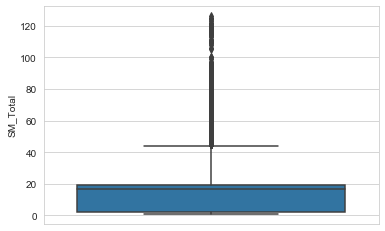

In [33]:
sns.boxplot(y='SM_Total',data=df1)
#75% of the times the SM_Total values are <=19 units

very Few Values are greater than 40 most of the values are concentrated between 0 and 40 

In [27]:
df1['SM_Total'].describe()

count    143492.000000
mean         15.815627
std          15.104572
min           1.000000
25%           2.000000
50%          17.000000
75%          19.000000
max         126.000000
Name: SM_Total, dtype: float64

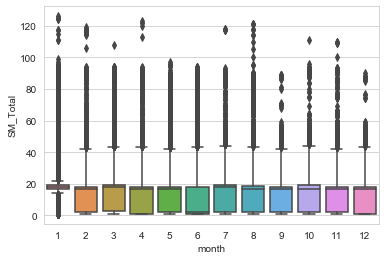

In [28]:
sns.boxplot(x='month',y='SM_Total',data=df1)

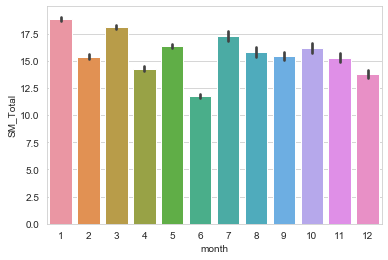

In [29]:
#The Sns.barplot function calculates the mean
sns.barplot(x='month',y='SM_Total',data=df1)

count    143492.000000
mean        238.411538
std           3.613917
min         223.490000
25%         235.860000
50%         238.760000
75%         241.050000
max         249.760000
Name: Voltage, dtype: float64

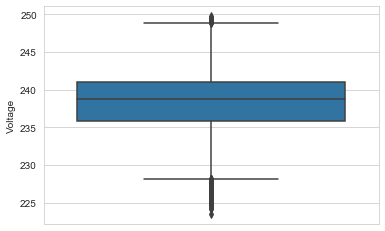

In [30]:
#Hypothesis -- Voltage effects SM_Total
sns.boxplot(y='Voltage',data=df1)
df1['Voltage'].describe()

Mean,Min,Max does not have much difference Voltage does not seems fluctates so we can't say voltage effects SM_Total so we will divide voltage as high or low

In [47]:
df1['alert']=np.where(df1['Voltage']>239,'High','low')
df1.head()

C:\Users\iPC\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Time,GAP,GRP,Voltage,GI,sm1,sm2,sm3,year,month,SM_Total,alert
21,1/1/07,0:21:00,2.550,0.116,241.15,10.4,0.0,1.0,0.0,2007,1,1.0,High
22,1/1/07,0:22:00,2.554,0.118,241.55,10.6,0.0,1.0,0.0,2007,1,1.0,High
23,1/1/07,0:23:00,2.650,0.218,241.67,11.0,0.0,2.0,0.0,2007,1,2.0,High
24,1/1/07,0:24:00,2.682,0.258,242.45,11.0,0.0,1.0,0.0,2007,1,1.0,High
25,1/1/07,0:25:00,2.660,0.252,241.60,11.0,0.0,1.0,0.0,2007,1,1.0,High


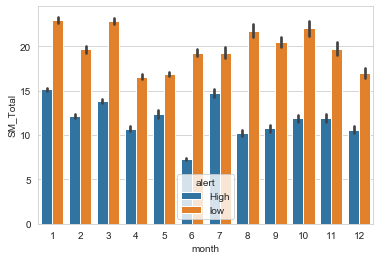

In [44]:
sns.barplot(x='month', y='SM_Total',hue='alert',data=df1)
#The average SM_Toal values are lower for when voltage is high as 
# compared to when voltage is low

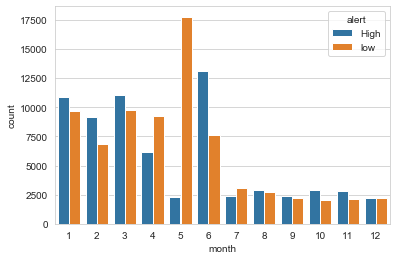

In [45]:
sns.countplot(x='month',hue='alert',data=df1)
#Usage is adjusted as per electricity voltage

In [ ]:
#Relationship Between Sm_total and GAP,GRP

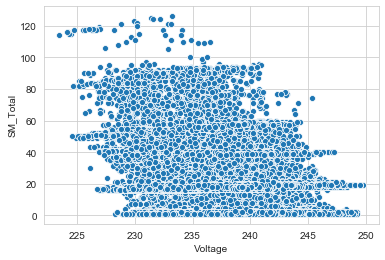

In [62]:
sns.scatterplot(x='Voltage',y='SM_Total',data=df1)

count    143492.000000
mean          1.672875
std           1.270960
min           0.102000
25%           0.524000
50%           1.412000
75%           2.240000
max          10.670000
Name: GAP, dtype: float64

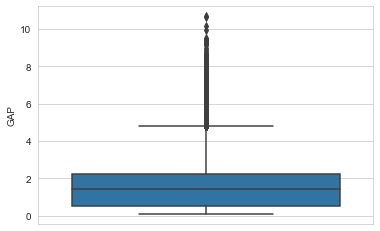

In [77]:
#Hypothesis-- GAP effects SM_Total 
sns.boxplot(y='GAP',data=df1)
df1['GAP'].describe()

In [66]:
df1['Alert1']=np.where(df1['GAP']>1.672875,'High','Low')
df1.head()

C:\Users\iPC\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Time,GAP,GRP,Voltage,GI,sm1,sm2,sm3,year,month,SM_Total,alert,Alert1
21,1/1/07,0:21:00,2.550,0.116,241.15,10.4,0.0,1.0,0.0,2007,1,1.0,High,High
22,1/1/07,0:22:00,2.554,0.118,241.55,10.6,0.0,1.0,0.0,2007,1,1.0,High,High
23,1/1/07,0:23:00,2.650,0.218,241.67,11.0,0.0,2.0,0.0,2007,1,2.0,High,High
24,1/1/07,0:24:00,2.682,0.258,242.45,11.0,0.0,1.0,0.0,2007,1,1.0,High,High
25,1/1/07,0:25:00,2.660,0.252,241.60,11.0,0.0,1.0,0.0,2007,1,1.0,High,High


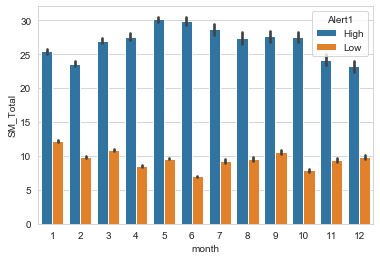

In [75]:
sns.barplot(x='month',y='SM_Total',hue='Alert1',data=df1)

SM_Total is low for GAP Low and High for GAP High 

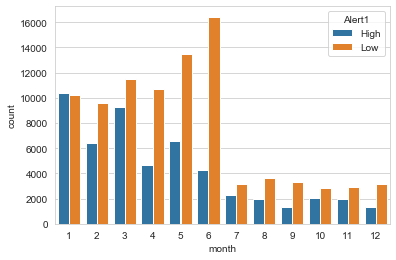

In [76]:
sns.countplot(x='month',hue='Alert1',data=df1)

count    143492.000000
mean          0.157602
std           0.120065
min           0.000000
25%           0.076000
50%           0.132000
75%           0.230000
max           1.148000
Name: GRP, dtype: float64

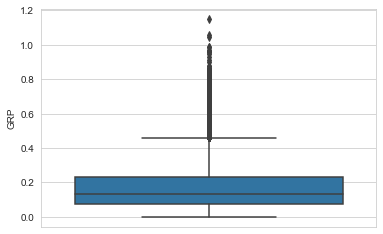

In [78]:
#Hypothesis-- GRP effects SM_Total 
sns.boxplot(y='GRP',data=df1)
df1['GRP'].describe()

In [79]:
df1['Alert2']=np.where(df1['GRP']> 0.157602,'High','Low')
df1.head()

C:\Users\iPC\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Time,GAP,GRP,Voltage,GI,sm1,sm2,sm3,year,month,SM_Total,alert,Alert1,Alert2
21,1/1/07,0:21:00,2.550,0.116,241.15,10.4,0.0,1.0,0.0,2007,1,1.0,High,High,Low
22,1/1/07,0:22:00,2.554,0.118,241.55,10.6,0.0,1.0,0.0,2007,1,1.0,High,High,Low
23,1/1/07,0:23:00,2.650,0.218,241.67,11.0,0.0,2.0,0.0,2007,1,2.0,High,High,High
24,1/1/07,0:24:00,2.682,0.258,242.45,11.0,0.0,1.0,0.0,2007,1,1.0,High,High,High
25,1/1/07,0:25:00,2.660,0.252,241.60,11.0,0.0,1.0,0.0,2007,1,1.0,High,High,High


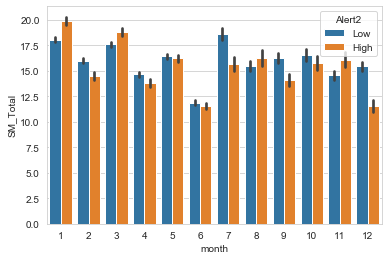

In [82]:
sns.barplot(x='month',y='SM_Total',hue='Alert2',data=df1)

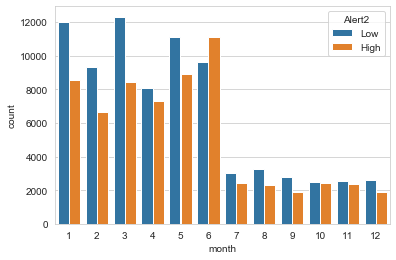

In [83]:
sns.countplot(x='month',hue='Alert2',data=df1)

In [98]:
df2=df1[['GAP','GRP','Voltage','GI','SM_Total']]
df2.head()

,GAP,GRP,Voltage,GI,SM_Total
21,2.550,0.116,241.15,10.4,1.0
22,2.554,0.118,241.55,10.6,1.0
23,2.650,0.218,241.67,11.0,2.0
24,2.682,0.258,242.45,11.0,1.0
25,2.660,0.252,241.60,11.0,1.0


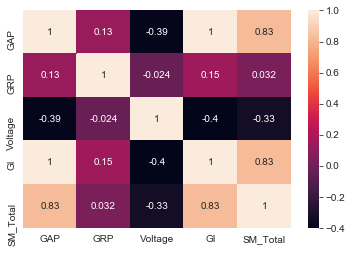

In [106]:
#To check if there is any Multicollineary issue
sns.heatmap(df2.corr(),annot=True)

We found that there is no multicollineary issue as no two columns are highly correlated 
to each other except with SM_total(dependent Variable) and GAP(0.83),GI(0.83) are highly positively correlated to SM_Total.

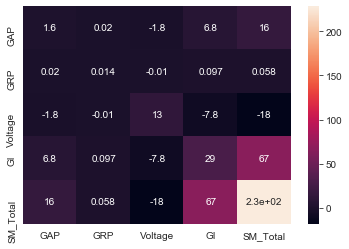

In [107]:
#To check Covariance Between The Columns
sns.heatmap(df2.cov(),annot=True)